In [1]:
import pandas as pd

# Import the CSV file
df = pd.read_csv('Economic Factors - Asia.csv')

# Display the first few rows of the dataframe
print(df.head())

       Country  Year      AHFFpC      EXPpC       GDPpC    GGFCEpC  \
0  Afghanistan  1970  697.867458  13.842727  936.810946  29.433440   
1  Afghanistan  1971  653.544944  17.409942  909.657969  29.413537   
2  Afghanistan  1972  609.908421  20.524254  771.889702  29.938200   
3  Afghanistan  1973  621.912793  24.873150  736.456563  30.590262   
4  Afghanistan  1974  632.756152  32.858164  753.604214  30.698176   

        HCEpC      IMPpC       MMUpC      TSCpC     WRRHpC  FDI.INpC  
0  244.697351  14.520470   92.104757  23.581216  38.468030  0.124444  
1  227.827289  20.628424   93.920249  20.860562  34.029828  0.225804  
2  214.496594  21.019145   95.641586  19.696652  32.131142  0.070261  
3  225.032288  21.412249   97.412179  22.007160  35.900272  0.116780  
4  236.999302  28.900028  103.521151  25.942693  38.005432       NaN  


In [2]:
import pandas as pd
import numpy as np


non_null_counts = df.count()

# Find highest and lowest values for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
highest_values = df[numeric_columns].max()
lowest_values = df[numeric_columns].min()

# Calculate percent change for numeric columns
pct_change = df[numeric_columns].pct_change()

# Find largest increases and decreases
largest_increases = pct_change.max()
largest_decreases = pct_change.min()

# Identify outliers using IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

print("Non-null counts:\n", non_null_counts)
print("\nHighest values:\n", highest_values)
print("\nLowest values:\n", lowest_values)
print("\nLargest increases:\n", largest_increases)
print("\nLargest decreases:\n", largest_decreases)
print("\nNumber of outliers:\n", outliers)

Non-null counts:
 Country     1971
Year        1971
AHFFpC      1971
EXPpC       1971
GDPpC       1971
GGFCEpC     1971
HCEpC       1971
IMPpC       1971
MMUpC       1971
TSCpC       1971
WRRHpC      1971
FDI.INpC    1828
dtype: int64

Highest values:
 Year          2020.000000
AHFFpC        1435.641871
EXPpC       109967.760700
GDPpC       122508.688800
GGFCEpC      27088.091830
HCEpC        39637.243510
IMPpC        93656.848400
MMUpC        89777.977130
TSCpC         6707.512703
WRRHpC       18580.944720
FDI.INpC     24262.870190
dtype: float64

Lowest values:
 Year        1970.000000
AHFFpC        16.953805
EXPpC          2.014701
GDPpC        150.584304
GGFCEpC        4.447081
HCEpC        103.020829
IMPpC          6.609190
MMUpC         10.196480
TSCpC        -80.181671
WRRHpC        11.523590
FDI.INpC   -3101.858697
dtype: float64

Largest increases:
 Year        5.076142e-04
AHFFpC      8.365721e+00
EXPpC       3.795195e+02
GDPpC       4.193652e+01
GGFCEpC     4.908954e+01
HCEp

C:\Users\Katarina\AppData\Local\Temp\ipykernel_30392\3961753755.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change = df[numeric_columns].pct_change()


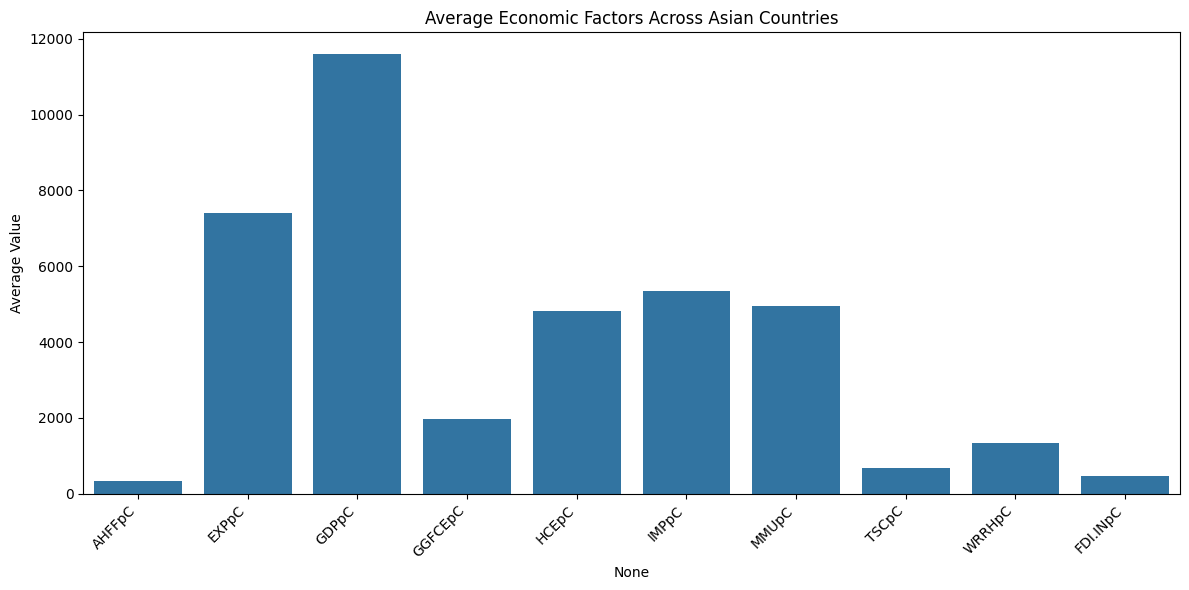

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Economic Factors - Asia.csv')

# Clean the 'Country' column by removing duplicates
df['Country'] = df['Country'].str.split('Afghanistan').str[0]

# Calculate the mean of each economic factor
mean_values = df.drop(['Country', 'Year'], axis=1).mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_values.index, y=mean_values.values)
plt.title('Average Economic Factors Across Asian Countries')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Value')
plt.tight_layout()
plt.show()

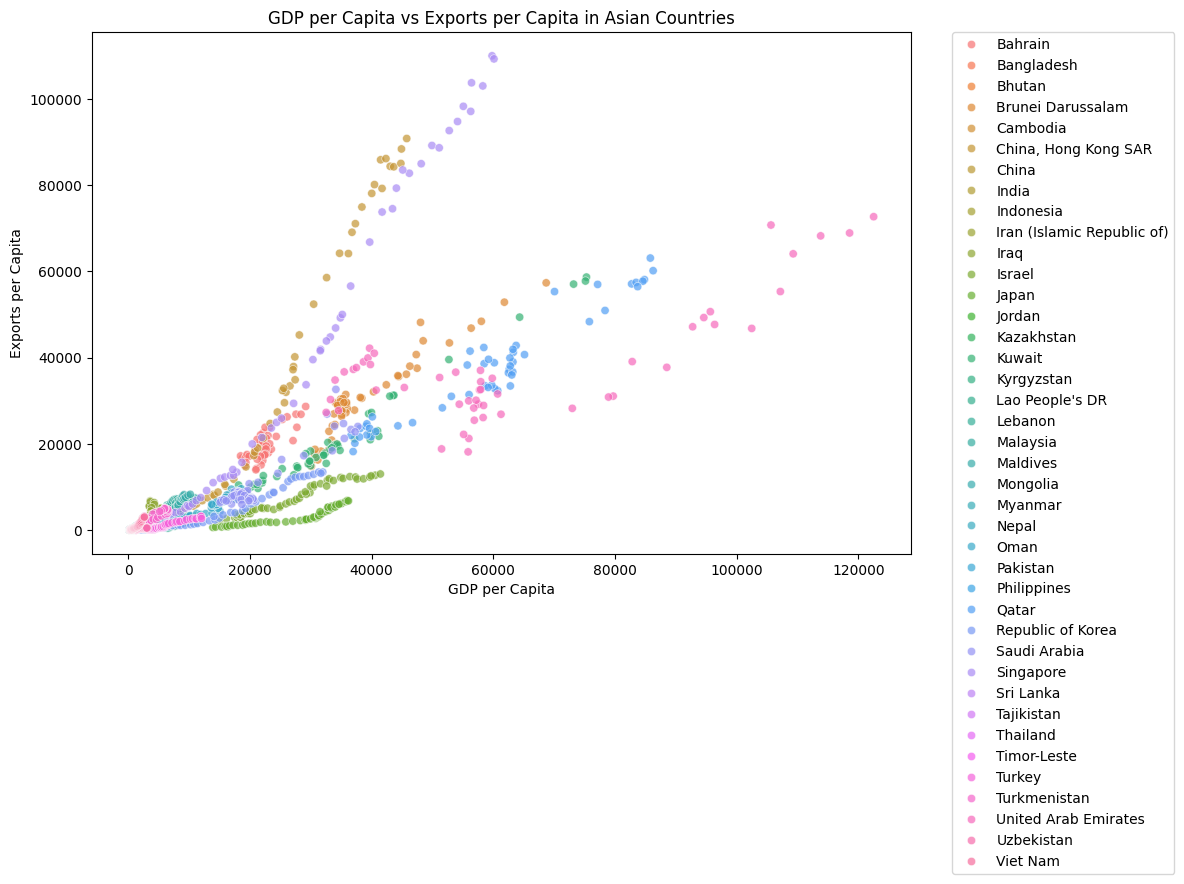

In [6]:
# Create the scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='GDPpC', y='EXPpC', hue='Country', alpha=0.7)

plt.title('GDP per Capita vs Exports per Capita in Asian Countries')
plt.xlabel('GDP per Capita')
plt.ylabel('Exports per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

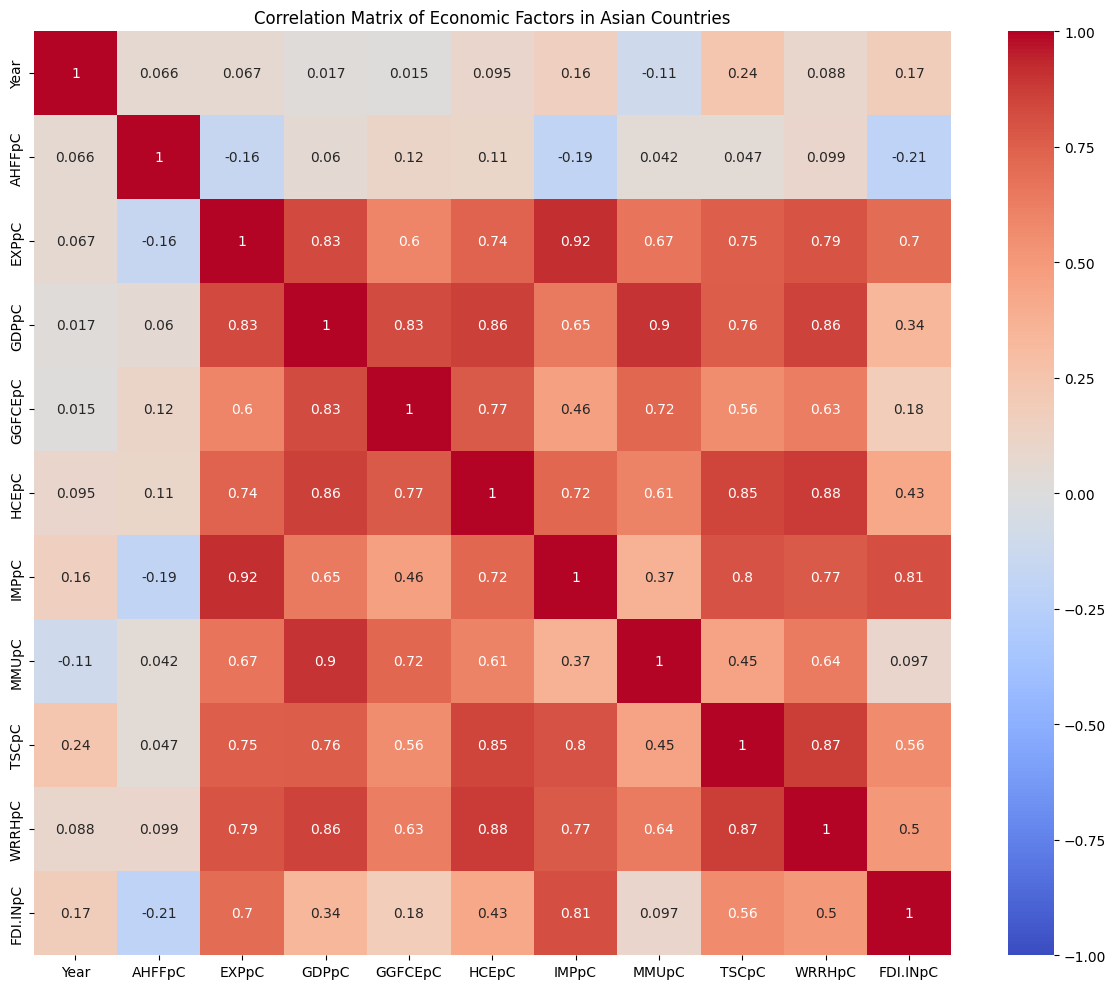

In [7]:
# Select numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Economic Factors in Asian Countries')
plt.tight_layout()
plt.show()

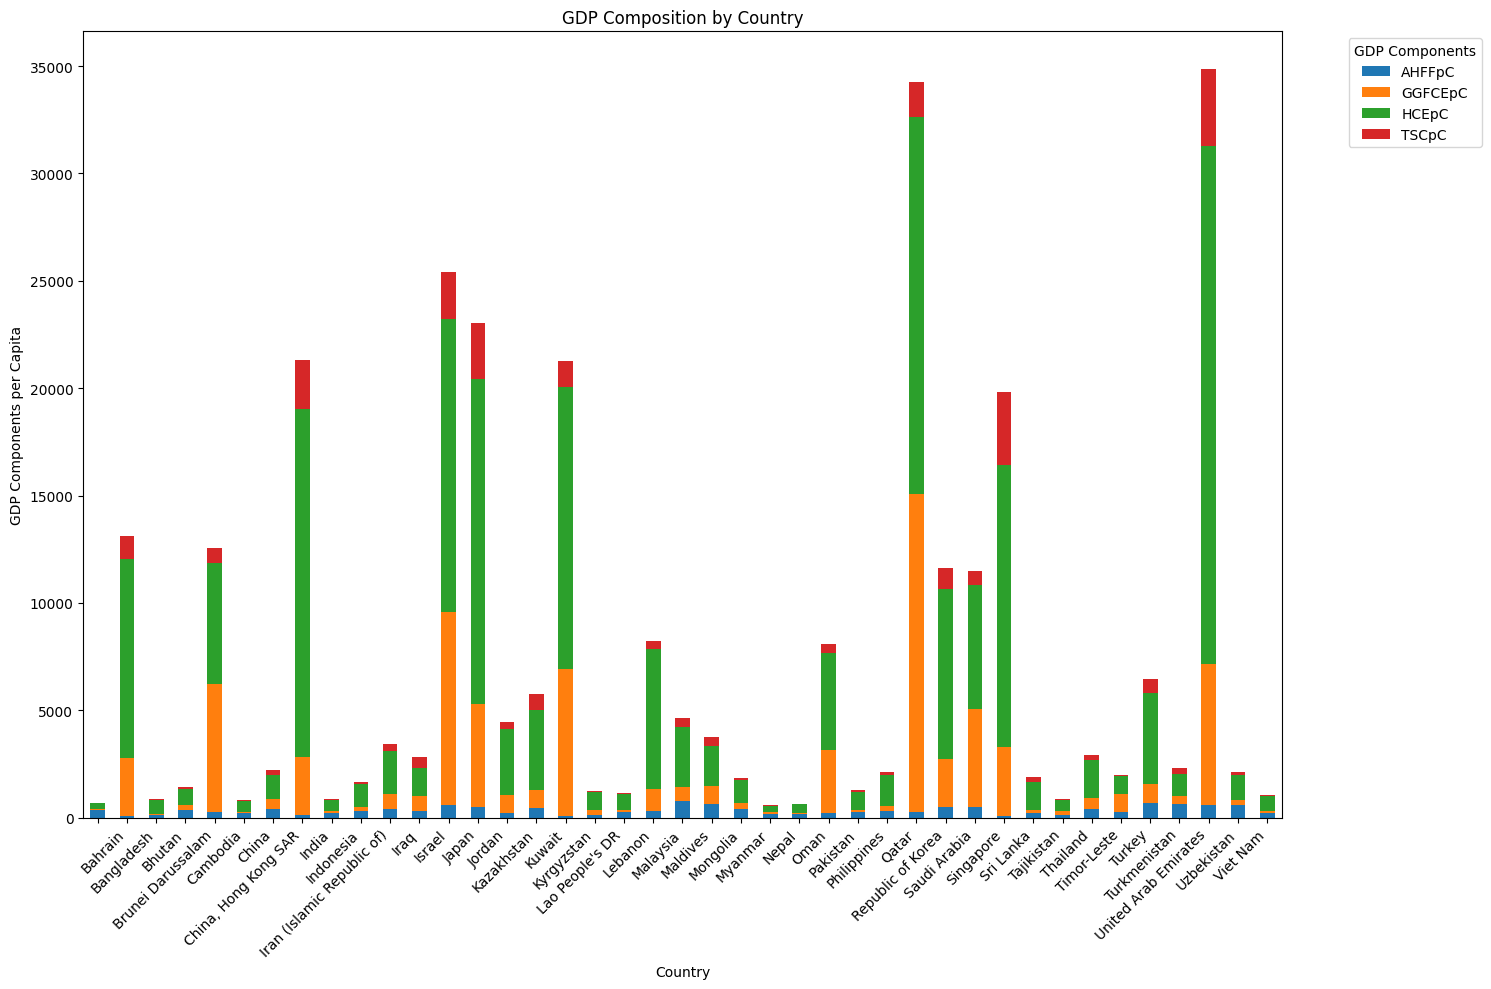

In [8]:
gdp_components = ['AHFFpC', 'GGFCEpC', 'HCEpC', 'TSCpC']

# Group by country and calculate the mean of each component
gdp_composition = df.groupby('Country')[gdp_components].mean()

# Create stacked bar chart
ax = gdp_composition.plot(kind='bar', stacked=True, figsize=(15, 10))

plt.title('GDP Composition by Country')
plt.xlabel('Country')
plt.ylabel('GDP Components per Capita')
plt.legend(title='GDP Components', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

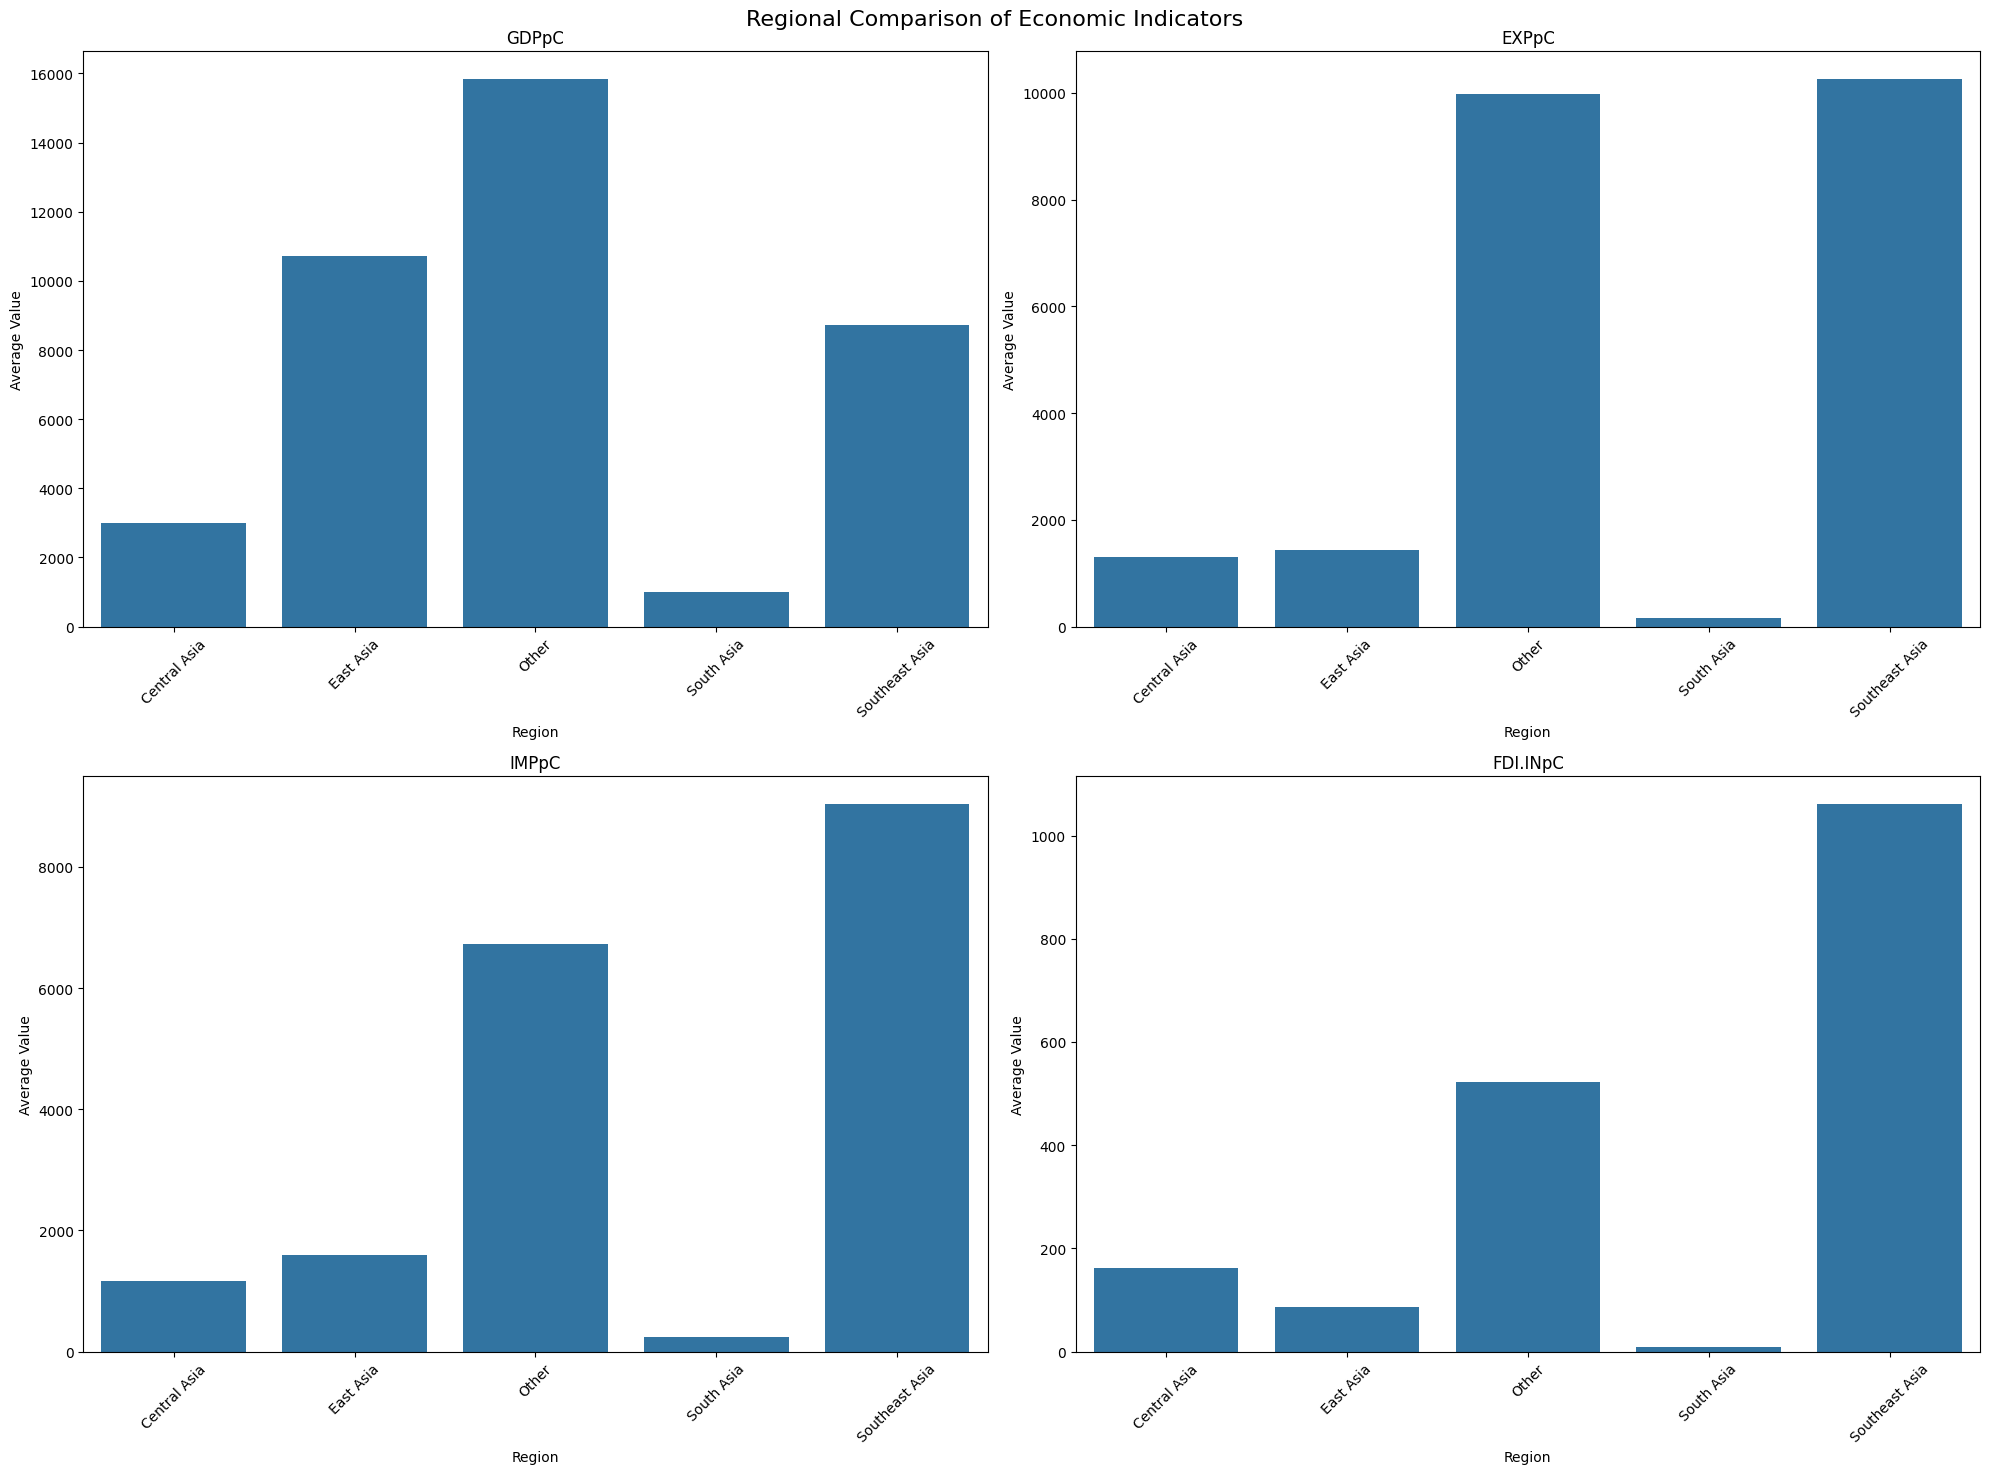

In [9]:
regions = {
    'East Asia': ['China', 'Japan', 'South Korea', 'Mongolia', 'Taiwan'],
    'Southeast Asia': ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'],
    'South Asia': ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal'],
    'Central Asia': ['Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan']
}

# Create a function to assign region
def assign_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return 'Other'

# Add region column to the dataframe
df['Region'] = df['Country'].apply(assign_region)

# Select economic indicators to compare
indicators = ['GDPpC', 'EXPpC', 'IMPpC', 'FDI.INpC']

# Calculate regional averages
regional_averages = df.groupby('Region')[indicators].mean()

# Create a bar plot for each indicator
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Regional Comparison of Economic Indicators', fontsize=16)

for i, indicator in enumerate(indicators):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=regional_averages.index, y=regional_averages[indicator], ax=ax)
    ax.set_title(indicator)
    ax.set_xlabel('Region')
    ax.set_ylabel('Average Value')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

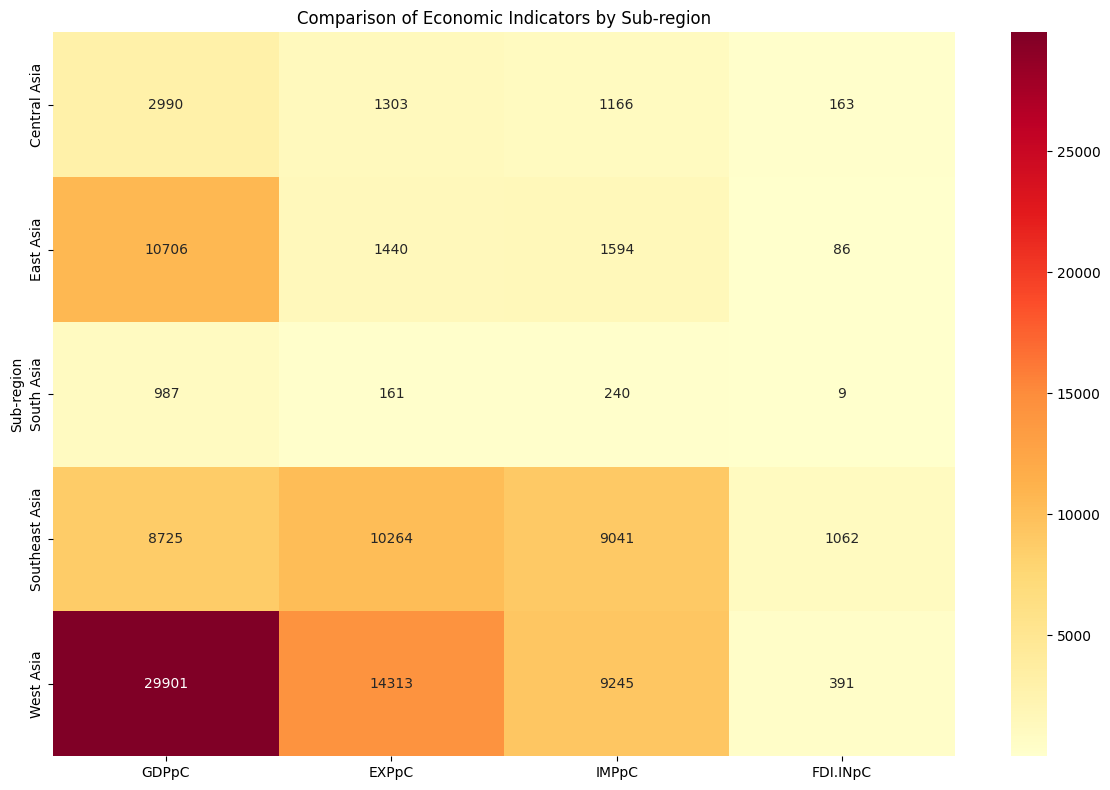

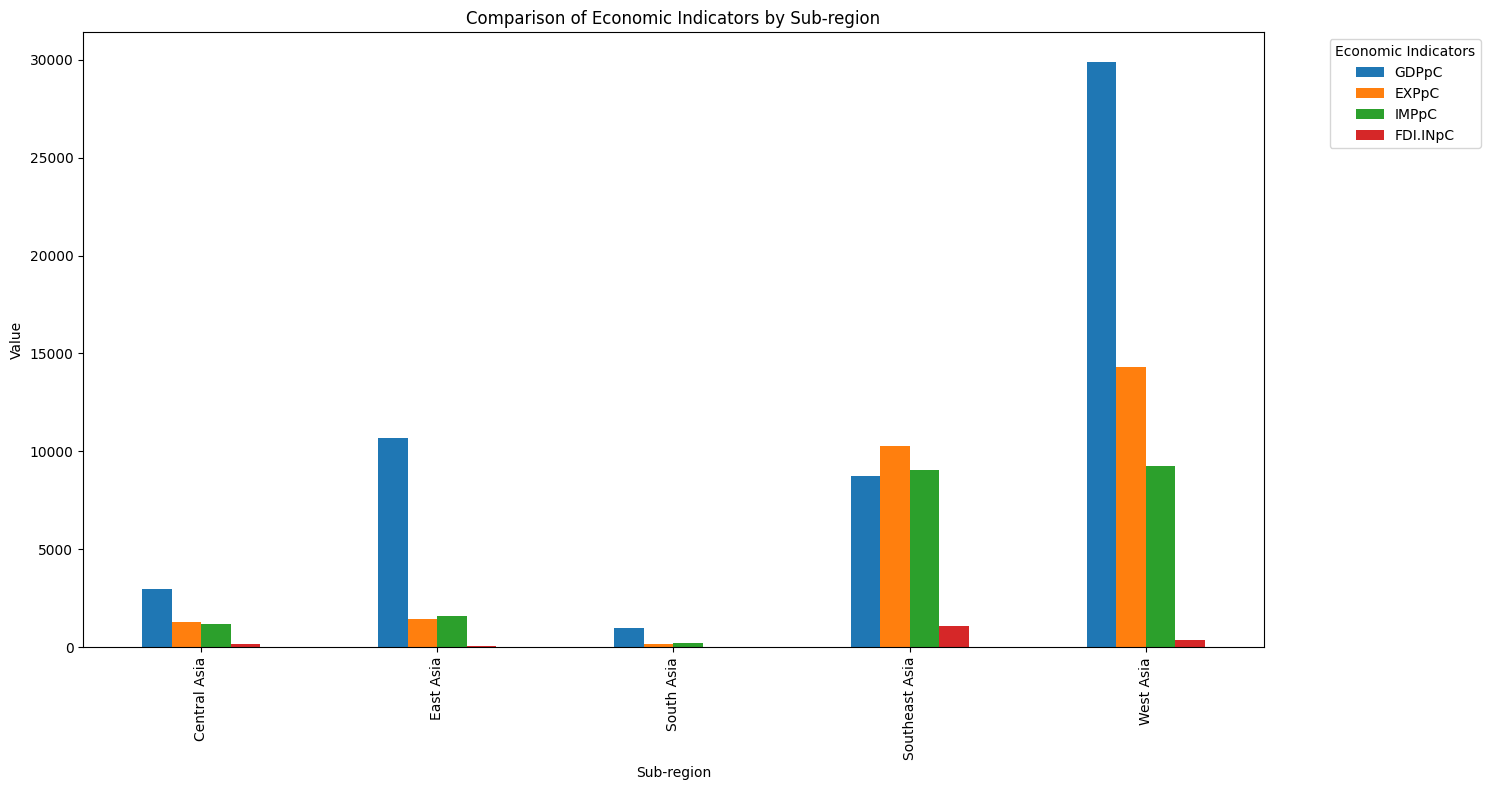

In [10]:
sub_regions = {
    'East Asia': ['China', 'Japan', 'South Korea', 'Mongolia', 'Taiwan'],
    'Southeast Asia': ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'],
    'South Asia': ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal'],
    'Central Asia': ['Kazakhstan', 'Uzbekistan', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan'],
    'West Asia': ['Saudi Arabia', 'Turkey', 'Iran', 'United Arab Emirates', 'Israel']
}

# Create a new column for sub-region
df['Sub-region'] = df['Country'].map({country: region for region, countries in sub_regions.items() for country in countries})

# Select economic indicators to compare
indicators = ['GDPpC', 'EXPpC', 'IMPpC', 'FDI.INpC']

# Calculate mean values for each sub-region
regional_means = df.groupby('Sub-region')[indicators].mean()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(regional_means, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Comparison of Economic Indicators by Sub-region')
plt.tight_layout()
plt.show()

# Create a grouped bar plot
regional_means.plot(kind='bar', figsize=(15, 8))
plt.title('Comparison of Economic Indicators by Sub-region')
plt.xlabel('Sub-region')
plt.ylabel('Value')
plt.legend(title='Economic Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

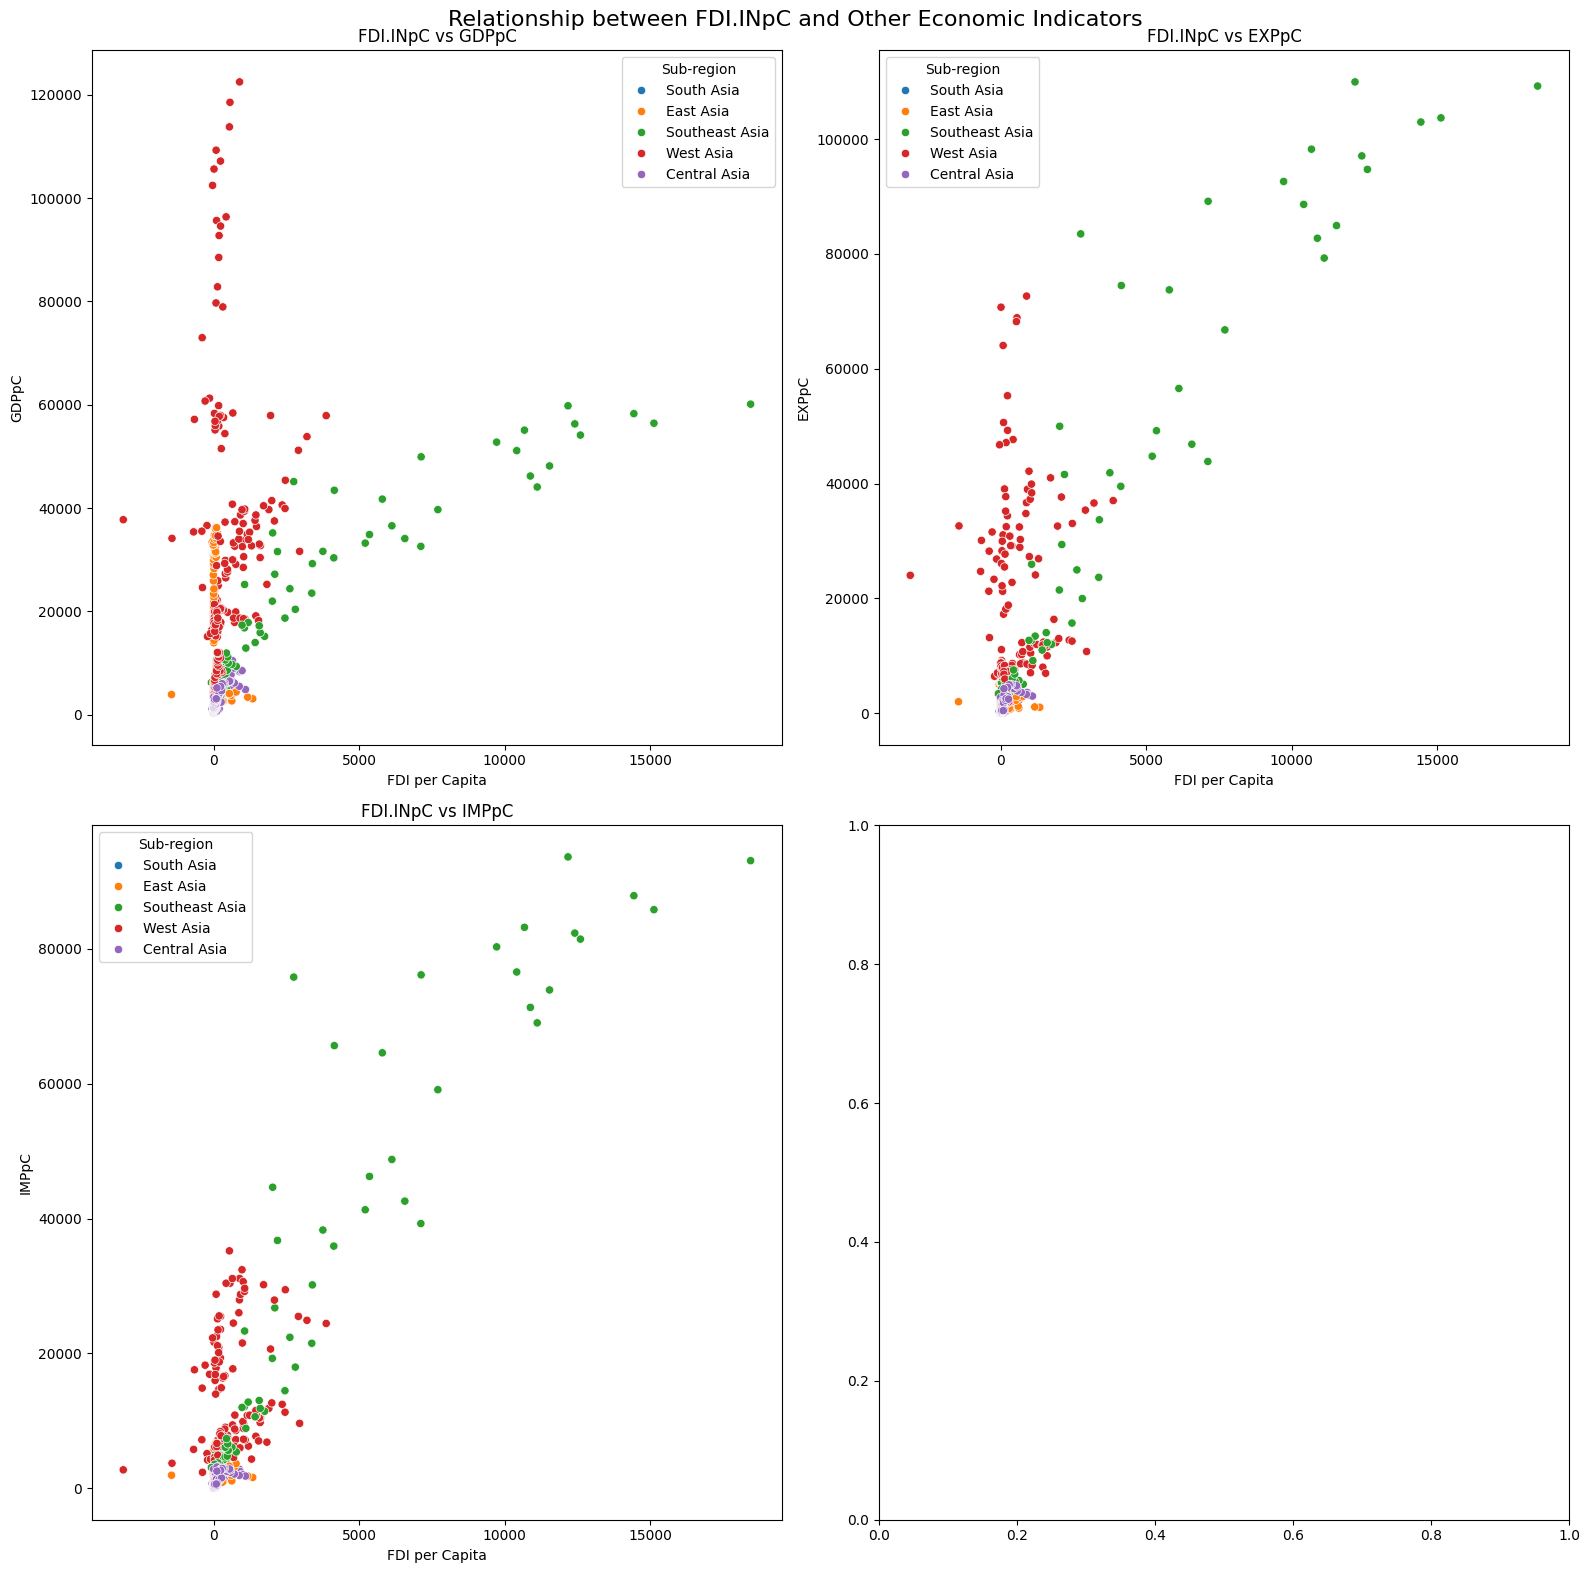

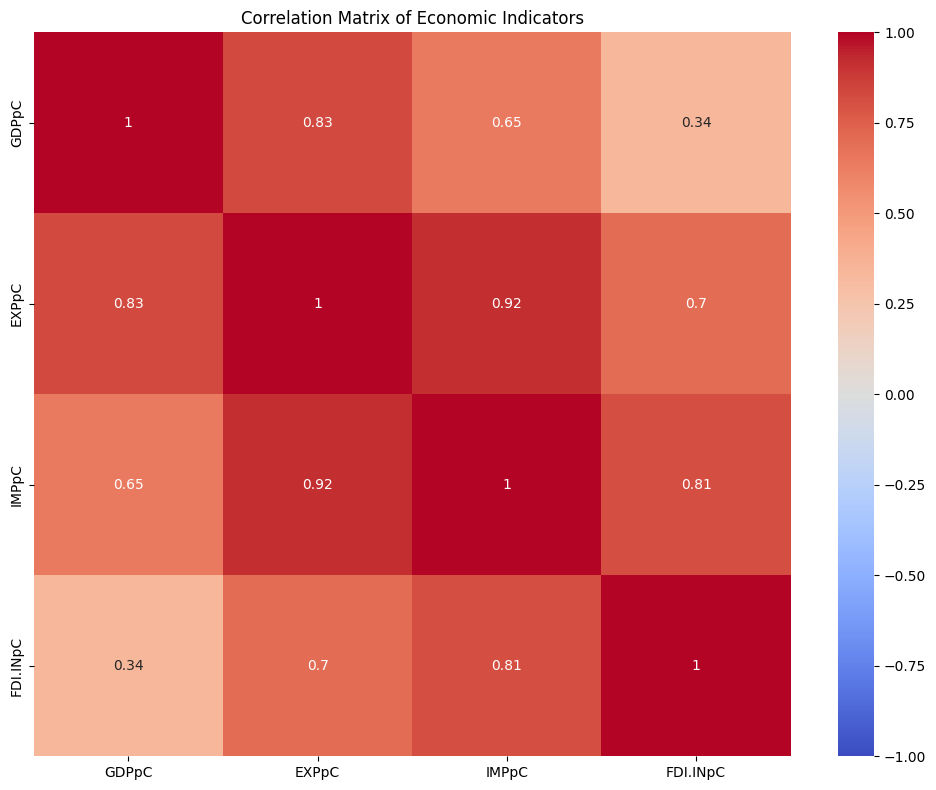

In [11]:
# Select economic indicators to compare with FDI.INpC
indicators = ['GDPpC', 'EXPpC', 'IMPpC', 'FDI.INpC']

# Create scatter plots
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Relationship between FDI.INpC and Other Economic Indicators', fontsize=16)

for i, indicator in enumerate(indicators[:-1]):
    row = i // 2
    col = i % 2
    sns.scatterplot(data=df, x='FDI.INpC', y=indicator, hue='Sub-region', ax=axes[row, col])
    axes[row, col].set_title(f'FDI.INpC vs {indicator}')
    axes[row, col].set_xlabel('FDI per Capita')
    axes[row, col].set_ylabel(indicator)

plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = df[indicators].corr()

# Create heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Economic Indicators')
plt.tight_layout()
plt.show()

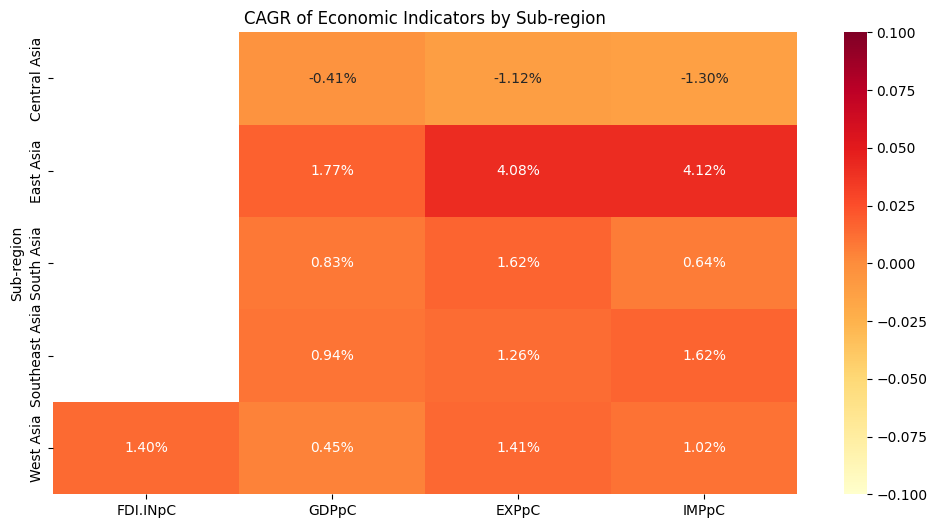

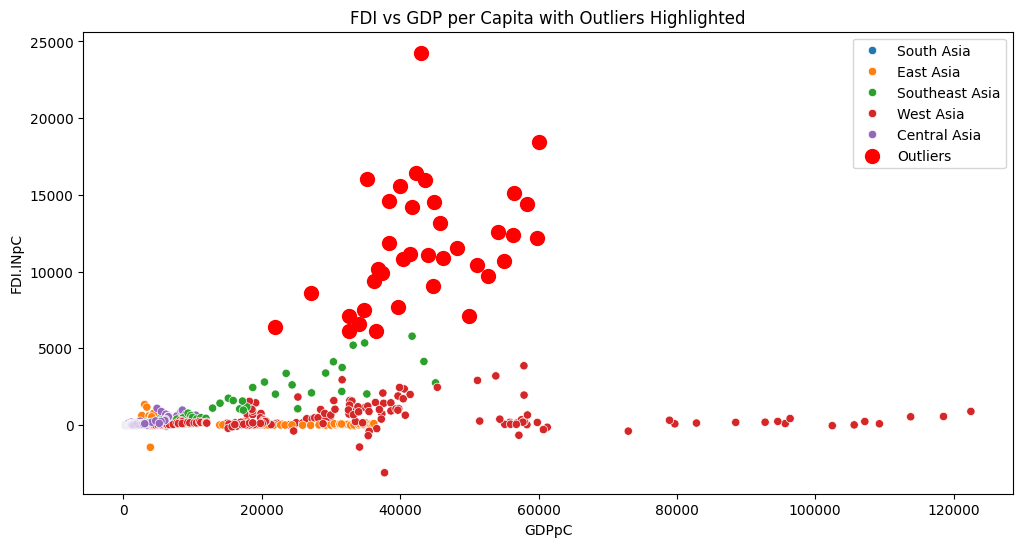

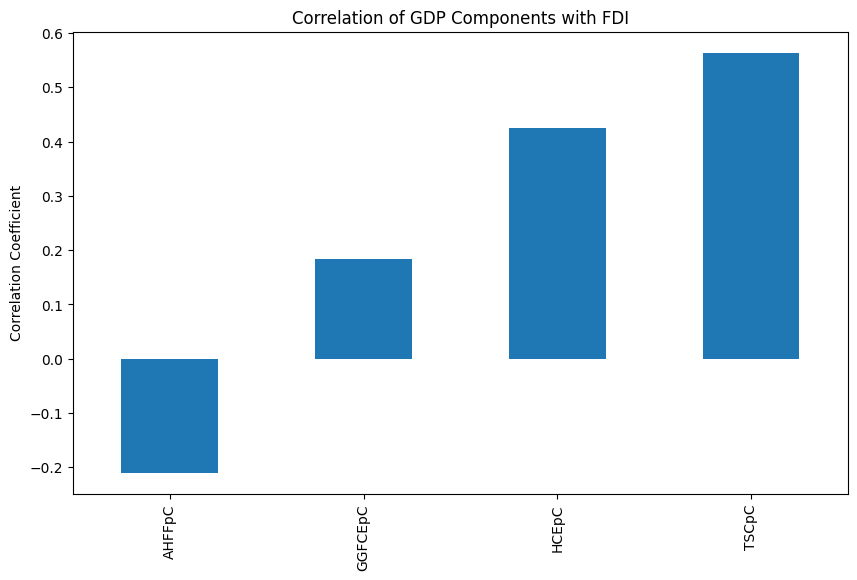

In [12]:
def calculate_cagr(group):
    start_value = group.iloc[0]
    end_value = group.iloc[-1]
    years = len(group)
    cagr = (end_value / start_value) ** (1 / years) - 1
    return cagr

cagr_by_subregion = df.groupby('Sub-region')[['FDI.INpC', 'GDPpC', 'EXPpC', 'IMPpC']].apply(calculate_cagr)

# Visualize CAGR
plt.figure(figsize=(12, 6))
sns.heatmap(cagr_by_subregion, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('CAGR of Economic Indicators by Sub-region')
plt.show()

# Outlier Analysis
z_scores = np.abs((df['FDI.INpC'] - df['FDI.INpC'].mean()) / df['FDI.INpC'].std())
outliers = df[z_scores > 3]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='GDPpC', y='FDI.INpC', hue='Sub-region')
plt.scatter(outliers['GDPpC'], outliers['FDI.INpC'], color='red', s=100, label='Outliers')
plt.title('FDI vs GDP per Capita with Outliers Highlighted')
plt.legend()
plt.show()

# GDP Composition related to FDI
gdp_components = ['AHFFpC', 'GGFCEpC', 'HCEpC', 'TSCpC']
correlation_with_fdi = df[gdp_components + ['FDI.INpC']].corr()['FDI.INpC'].drop('FDI.INpC')

plt.figure(figsize=(10, 6))
correlation_with_fdi.plot(kind='bar')
plt.title('Correlation of GDP Components with FDI')
plt.ylabel('Correlation Coefficient')
plt.show()

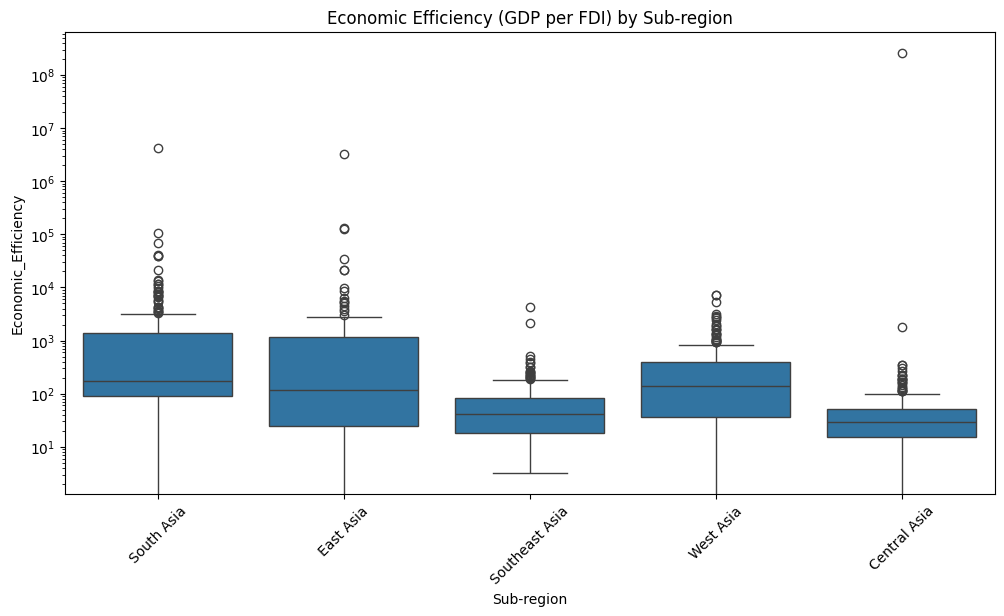

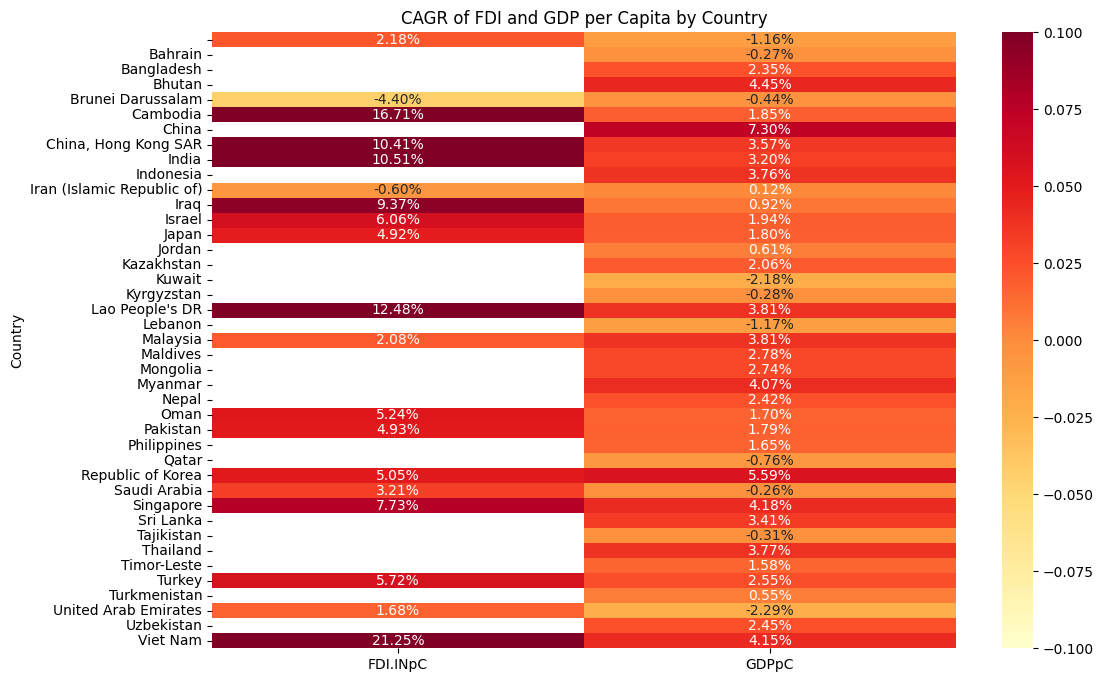

In [13]:
# Calculate economic efficiency (GDP per FDI)
df['Economic_Efficiency'] = df['GDPpC'] / df['FDI.INpC']

# Visualize economic efficiency
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-region', y='Economic_Efficiency', data=df)
plt.title('Economic Efficiency (GDP per FDI) by Sub-region')
plt.yscale('log')  # Using log scale due to potential large variations
plt.xticks(rotation=45)
plt.show()

# Calculate CAGR for FDI and GDP
def calculate_cagr(group):
    start_value = group.iloc[0]
    end_value = group.iloc[-1]
    years = len(group)
    cagr = (end_value / start_value) ** (1 / years) - 1
    return cagr

cagr_by_country = df.groupby('Country')[['FDI.INpC', 'GDPpC']].apply(calculate_cagr)

# Create heatmap of growth rates
plt.figure(figsize=(12, 8))
sns.heatmap(cagr_by_country, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('CAGR of FDI and GDP per Capita by Country')
plt.show()